In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    %config Completer.use_jedi = False
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from astropy.table import Table, join
from astropy.io import fits
from scipy.io import readsav
import pandas as pd

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [2]:
VB = Table.read('VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')
ag = Table.read('joinag.fits')

In [14]:
ag['source_id'] = ag['dr3_source_id']
ag = ag[~ag['source_id'].mask] # delete the missing values of the source_id

In [16]:
# join the table and get the stars that have >70% membership probability in globular clusters
join_VB_ag = join(VB,ag,keys = ['source_id'])

In [77]:
from astropy.table import unique
clusters = unique(join_VB_ag, keys='cluster')

In [80]:
# Assuming 'cluster' is the column name in the join_VB_ag table that indicates which cluster a star belongs to.

stars_per_cluster = []
for cluster_name in clusters['cluster']:
    count = len(join_VB_ag[join_VB_ag['cluster'] == cluster_name])
    stars_per_cluster.append(count)

print(stars_per_cluster)


[605, 72, 89, 80, 1, 1013, 13, 2]


In [82]:
NGC_104_47Tuc = join_VB_ag[join_VB_ag['cluster'] == 'NGC_104_47Tuc']
NGC_5139_oCen = join_VB_ag[join_VB_ag['cluster'] == 'NGC_5139_oCen']

In [19]:
JP = Table.read('Johnson_2010ApJ...722.1373J_tmassxmatch.fits')
dr3 = Table.read('GALAH_DR3_main_allspec_v1.fits')
dr3['tmass_id'] = dr3['star_id']

In [42]:
dr3_new = dr3['tmass_id','O_fe','Na_fe']
JP['tmass_id'] = JP['tmass_id'].astype(str)
dr3_new['tmass_id'] = dr3_new['tmass_id'].astype(str)

In [47]:
JP['tmass_id'] = [s.ljust(16)[:16] for s in JP['tmass_id']]


In [49]:
# non of the stars are in GALAH DR3??? 
join_JP_galah = join(dr3_new,JP,keys=['tmass_id'])


In [64]:
join_JP10_ag = join(ag,JP,keys=['tmass_id'])

## [Na/Fe] vs. [O/Fe] for GALAH and JP10
for GALAH and JP

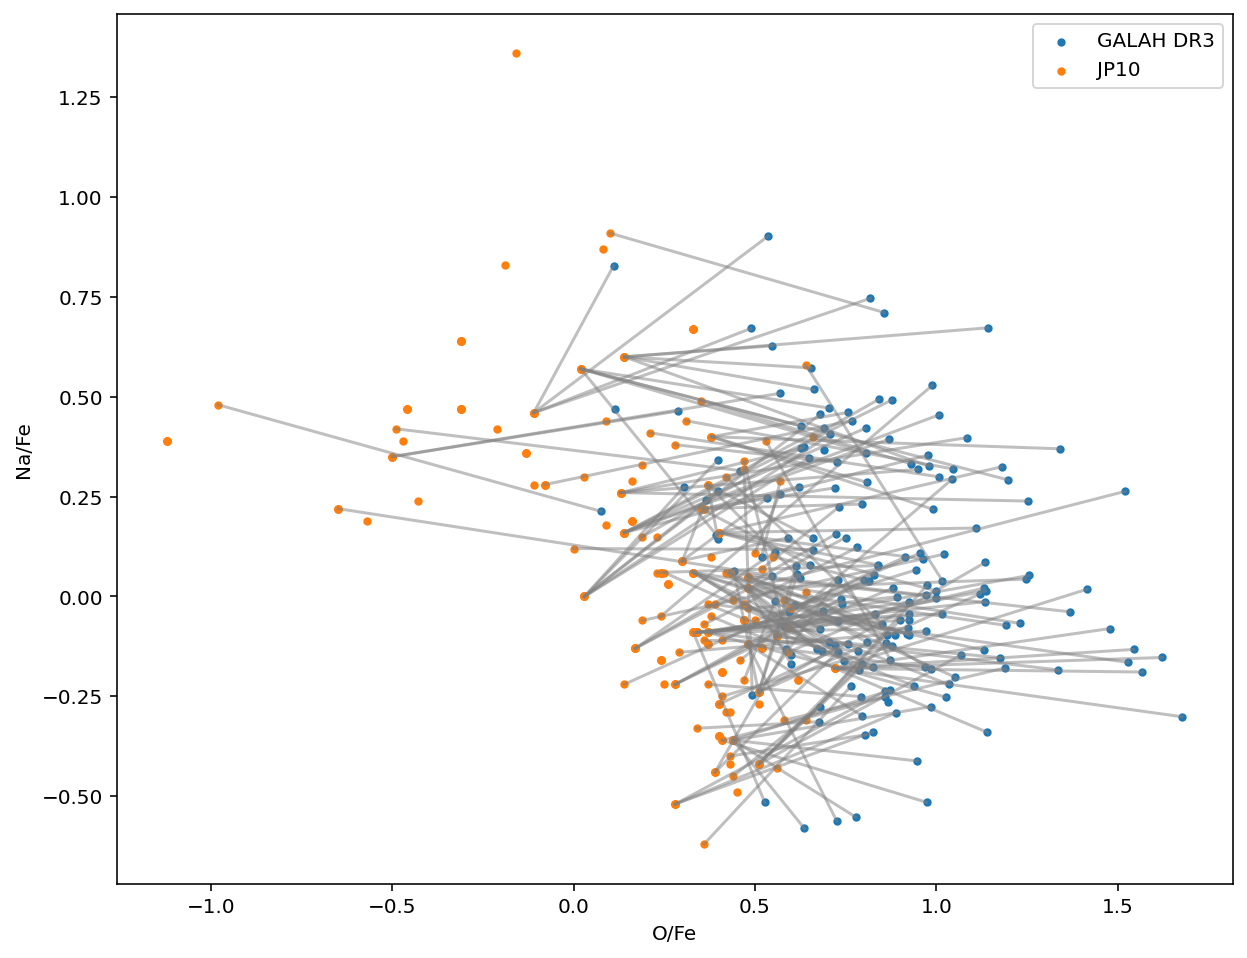

In [68]:
fig, ax = plt.subplots(figsize=(10,8))


ax.scatter(join_JP_galah['O_fe'], join_JP_galah['Na_fe'], s=10, label='GALAH DR3')
ax.scatter(join_JP_galah['__O_Fe_'], join_JP_galah['__Na_Fe_'], s=10, label='JP10')

# connect the data points 
for i in join_JP_galah:
    x_values = [i['O_fe'], i['__O_Fe_']]
    y_values = [i['Na_fe'], i['__Na_Fe_']]
    ax.plot(x_values, y_values, color='gray', alpha=0.5)  


ax.set_xlabel('O/Fe')
ax.set_ylabel('Na/Fe')
plt.legend();


## [Na/Fe] vs. [O/Fe] for APOGEE GALAH and JP10

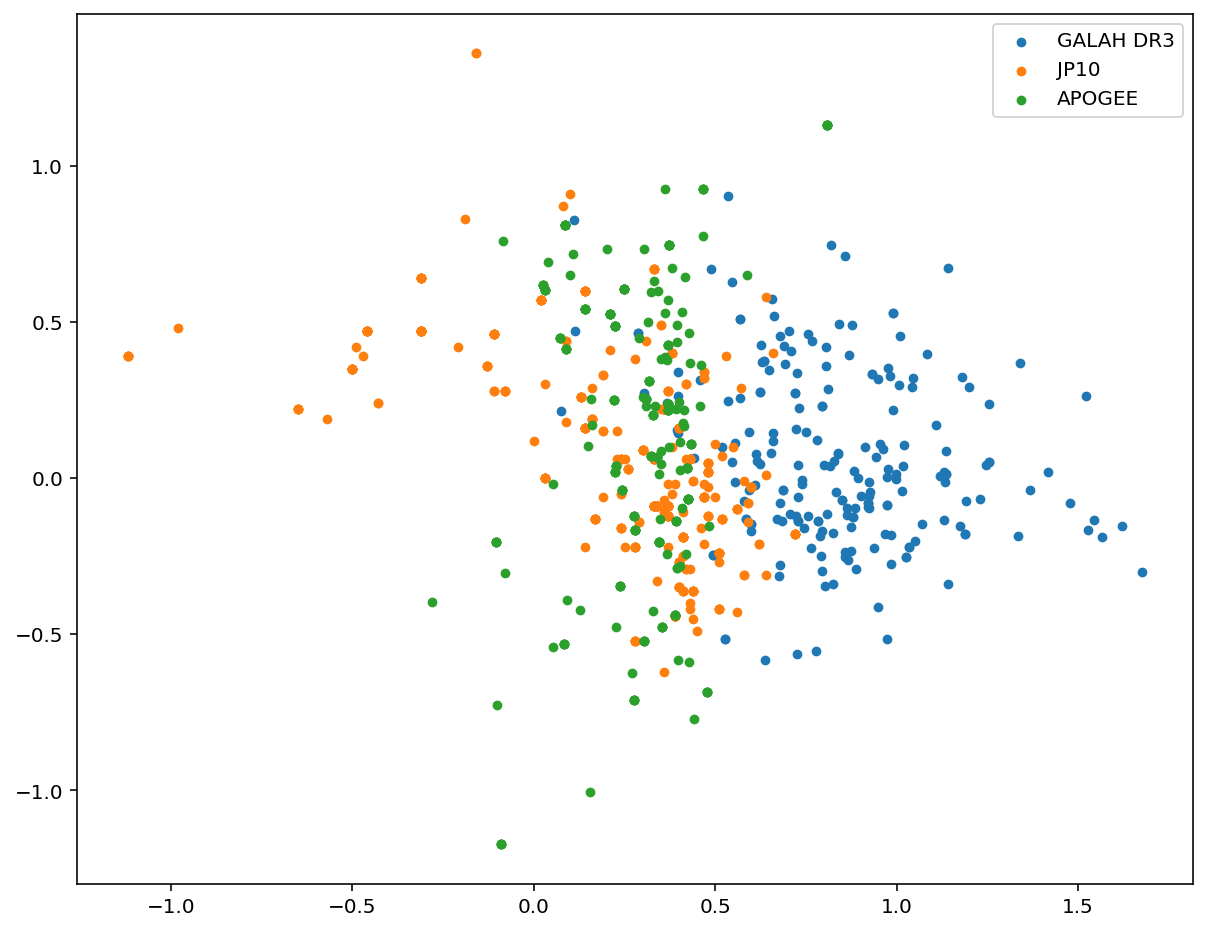

In [71]:
plt.figure(figsize=(10,8))

plt.scatter(join_JP10_ag['O_fe'],join_JP10_ag['Na_fe'],s = 15, label='GALAH DR3')
plt.scatter(join_JP10_ag['__O_Fe_'],join_JP10_ag['__Na_Fe_'],s = 15, label='JP10')
plt.scatter(join_JP10_ag['O_FE'],join_JP10_ag['NA_FE'],s = 15, label='APOGEE')
plt.legend();


### Plot for different clusters

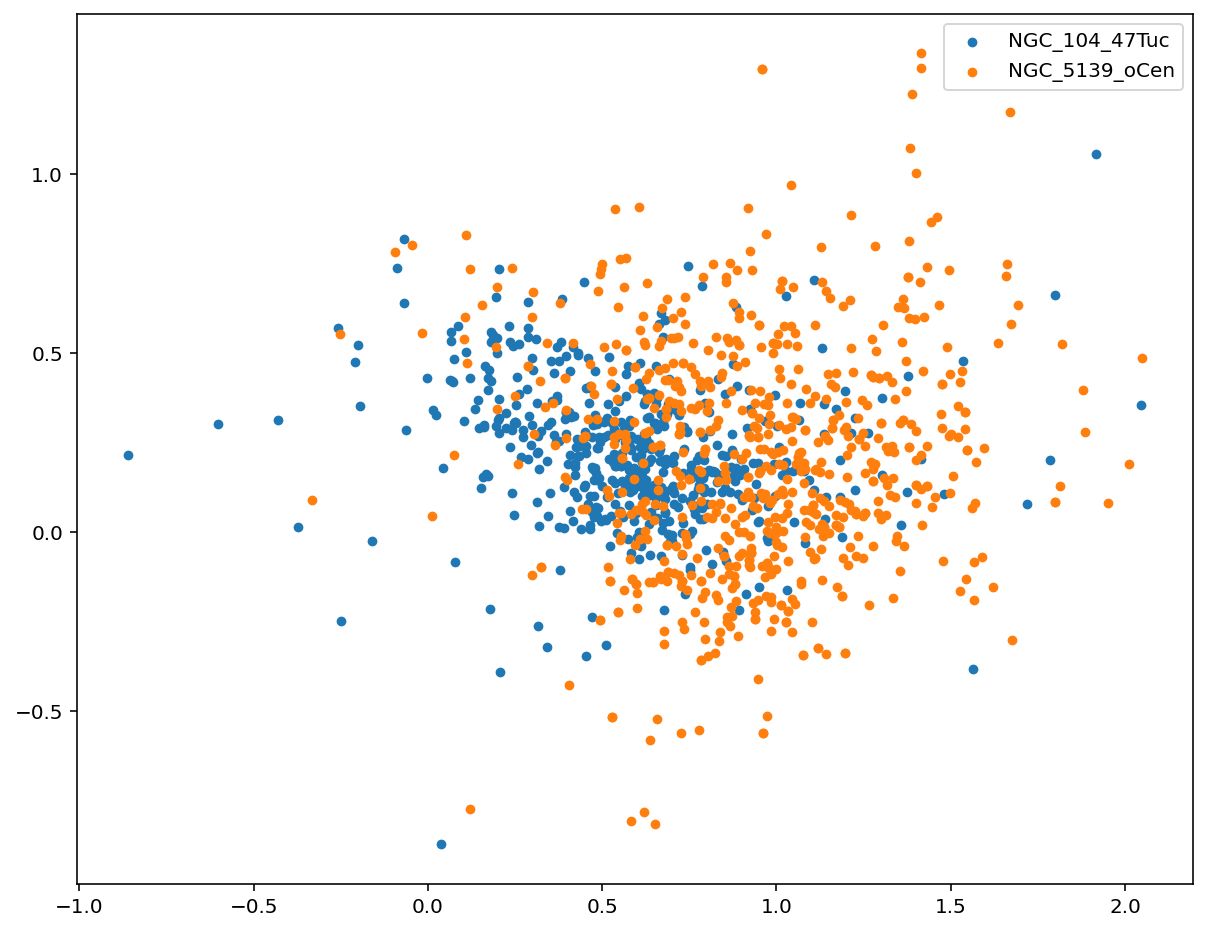

In [88]:
plt.figure(figsize=(10,8))

plt.scatter(NGC_104_47Tuc['O_fe'],NGC_104_47Tuc['Na_fe'],s = 15, label='NGC_104_47Tuc')
plt.scatter(NGC_5139_oCen['O_fe'],NGC_5139_oCen['Na_fe'],s = 15, label='NGC_5139_oCen')

plt.legend();